In [1]:
import re 
import pandas as pd 

In [2]:
file = open('WhatsApp Chat with MAMA 🏵️BHANEJ🍬 GROUP.txt','r',encoding='utf-8')
data = file.read()
data

'16/10/23, 1:58\u202fpm - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.\n18/06/15, 11:24\u202fpm - Monu Bhaiya created group "MAMA 🏵️BHANEJ🍬 GROUP"\n16/10/23, 1:58\u202fpm - Riya Di Kuwait added you\n16/10/23, 1:58\u202fpm - Riya Di Kuwait: Ab wish karo sab devang ko😂\n16/10/23, 1:58\u202fpm - Riya Di Kuwait: Happy Birthday Dev🥧🍫🎂\n16/10/23, 1:59\u202fpm - Inu Didi: 😂\n16/10/23, 1:59\u202fpm - Inu Didi: Subh kr liya call Kirk\n16/10/23, 2:00\u202fpm - Riya Di Kuwait: Call pe to mene bhi raat ko kar Liya tha but grp me attendance lagan thi na sabko....to ab laga esa😂😂\n16/10/23, 2:06\u202fpm - Inu Didi: Na  hm 1 hi bar krte h\n16/10/23, 2:07\u202fpm - Devang Mehta: 😂😂\n16/10/23, 2:08\u202fpm - Devang Mehta: Thank you thank  you😂\n16/10/23, 2:57\u202fpm - Aayush Bhaiya: Are yaar pehle wala wish waste ho gya...😔\n16/10/23, 2:57\u202fpm - Aayush Bhaiya: Happy birthday Dev🥳🥳\n16/10/23, 3:06\u202fpm - Riya Di Kuwait: Heh

In [3]:
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}(?:\s?(?:AM|PM|am|pm))?\s?[-–]\s'

In [4]:
messages = re.split(pattern,data)[1:]
print(messages)

['Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.\n', 'Monu Bhaiya created group "MAMA 🏵️BHANEJ🍬 GROUP"\n', 'Riya Di Kuwait added you\n', 'Riya Di Kuwait: Ab wish karo sab devang ko😂\n', 'Riya Di Kuwait: Happy Birthday Dev🥧🍫🎂\n', 'Inu Didi: 😂\n', 'Inu Didi: Subh kr liya call Kirk\n', 'Riya Di Kuwait: Call pe to mene bhi raat ko kar Liya tha but grp me attendance lagan thi na sabko....to ab laga esa😂😂\n', 'Inu Didi: Na  hm 1 hi bar krte h\n', 'Devang Mehta: 😂😂\n', 'Devang Mehta: Thank you thank  you😂\n', 'Aayush Bhaiya: Are yaar pehle wala wish waste ho gya...😔\n', 'Aayush Bhaiya: Happy birthday Dev🥳🥳\n', 'Riya Di Kuwait: Hehe😂😂\n', 'Devang Mehta: Thank you bhaiya😅\n', 'Inu Didi: Happy birthday Dev\n', '+91 97831 81380: Happy birthday 🎂 dev\n', 'Riya Di Kuwait: ARE FIR SE WISH KIYA INU😂😂\n', 'Devang Mehta: Thank you didi\n', 'Devang Mehta: Thank you didi\n', 'Devang Mehta: Thank you didi\n', 'Chachu: <Media omitted>\n

In [5]:
dates = re.findall(pattern,data)
# dates

In [7]:
df = pd.DataFrame({'user_message':messages, 'datetime':dates})

df['datetime'] = pd.to_datetime(
    df['datetime'].str.replace("\u202f", " ", regex=False).str.replace(" -", "", regex=False).str.strip(),
    errors="coerce",
    dayfirst=True,
    infer_datetime_format=True
)
df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13200\843869619.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['datetime'] = pd.to_datetime(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13200\843869619.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(


,user_message,datetime
0,Messages and calls are end-to-end encrypted. O...,2023-10-16 13:58:00
1,"Monu Bhaiya created group ""MAMA 🏵️BHANEJ🍬 GROU...",2015-06-18 23:24:00
2,Riya Di Kuwait added you\n,2023-10-16 13:58:00
3,Riya Di Kuwait: Ab wish karo sab devang ko😂\n,2023-10-16 13:58:00
4,Riya Di Kuwait: Happy Birthday Dev🥧🍫🎂\n,2023-10-16 13:58:00


In [8]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group notification')
        messages.append(entry[0])
df['user'] = users
df['message'] = messages

In [9]:
df.drop(columns=['user_message'],axis=1,inplace=True)

In [10]:
df['datetime']

0      2023-10-16 13:58:00
1      2015-06-18 23:24:00
2      2023-10-16 13:58:00
3      2023-10-16 13:58:00
4      2023-10-16 13:58:00
               ...        
1408   2025-08-12 12:27:00
1409   2025-08-12 12:27:00
1410   2025-08-15 07:49:00
1411   2025-08-15 08:00:00
1412   2025-08-16 17:20:00
Name: datetime, Length: 1413, dtype: datetime64[ns]

In [11]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month_name()
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute

In [12]:
df.head()

,datetime,user,message,year,month,day,hour,minute
0,2023-10-16 13:58:00,group notification,Messages and calls are end-to-end encrypted. O...,2023,October,16,13,58
1,2015-06-18 23:24:00,group notification,"Monu Bhaiya created group ""MAMA 🏵️BHANEJ🍬 GROU...",2015,June,18,23,24
2,2023-10-16 13:58:00,group notification,Riya Di Kuwait added you\n,2023,October,16,13,58
3,2023-10-16 13:58:00,Riya Di Kuwait,Ab wish karo sab devang ko😂\n,2023,October,16,13,58
4,2023-10-16 13:58:00,Riya Di Kuwait,Happy Birthday Dev🥧🍫🎂\n,2023,October,16,13,58


In [94]:
df[df['user']=='Fuaji Punali'].shape[0]

340

In [95]:
words = []
for message in df['message']:
    words.extend(message.split())
# print(words)

In [96]:
temp = df[df['message'] == '<Media omitted>\n'].shape[0]

In [97]:
from urlextract import URLExtract
extractor = URLExtract()

links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))
len(links)

61

In [98]:
import matplotlib.pyplot as plt

In [99]:
# x = df['user'].value_counts().head()
# fig, ax = plt.subplots()

In [100]:
# ax.bar(x.index,x.values,color='red')
# plt.xticks(rotation='vertical')
# plt.show()

In [101]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'user':'name', 'count':'percent'})

,name,percent
0,Fuaji Punali,24.06
1,Didi,10.90
2,Inu Didi,9.41
3,Fuaji Bankoda,7.50
4,Chachu,6.72
5,Badi Bhua,5.73
6,Aayush Bhaiya,4.74
7,Riya Didi India,4.18
8,Devang Mehta,4.10
9,Riya Di Kuwait,3.82


In [102]:
from wordcloud import WordCloud

In [103]:
wc = WordCloud(
    width=800,
    height=800,
    background_color="black",
    min_font_size=10
)
wc.generate(df['message'].str.cat(sep=' '))

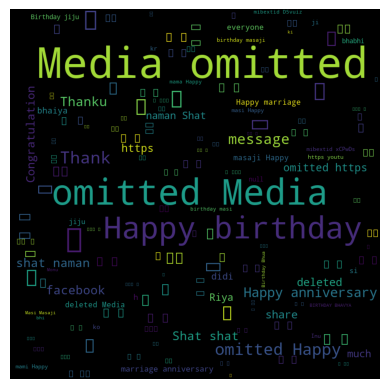

In [104]:
plt.imshow(wc)
plt.axis("off")
plt.show()

In [105]:
# remove message group notification
# remove message <Media omitted>\n
# remove hinglish stop words

In [106]:
temp = df[df['user']!='group notification']
temp = temp[temp['message']!='<Media omitted>\n']

In [107]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        words.append(word)

In [108]:
from collections import Counter
Counter(words).most_common(20)

[('happy', 339),
 ('birthday', 264),
 ('के', 107),
 ('anniversary', 72),
 ('से', 72),
 ('shat', 70),
 ('में', 69),
 ('you', 68),
 ('thank', 60),
 ('की', 58),
 ('thanku', 57),
 ('this', 49),
 ('message', 49),
 ('को', 49),
 ('और', 49),
 ('was', 46),
 ('deleted', 46),
 ('है', 45),
 ('पर', 44),
 ('to', 36)]

In [109]:
import emoji

In [110]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if emoji.is_emoji(c)])

In [111]:
pd.DataFrame(Counter(emojis).most_common()).columns

RangeIndex(start=0, stop=2, step=1)

In [112]:
df['month_num'] = df['datetime'].dt.month

In [113]:
timeline = df.groupby(['year','month','month_num']).count()['message'].reset_index()

In [114]:
timeline

,year,month,month_num,message
0,2015,June,6,1
1,2023,December,12,53
2,2023,November,11,76
3,2023,October,10,75
4,2024,April,4,44
5,2024,August,8,41
6,2024,December,12,57
7,2024,February,2,44
8,2024,January,1,26
9,2024,July,7,34


In [115]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + '-' + str(timeline['year'][i]))

timeline['time'] = time

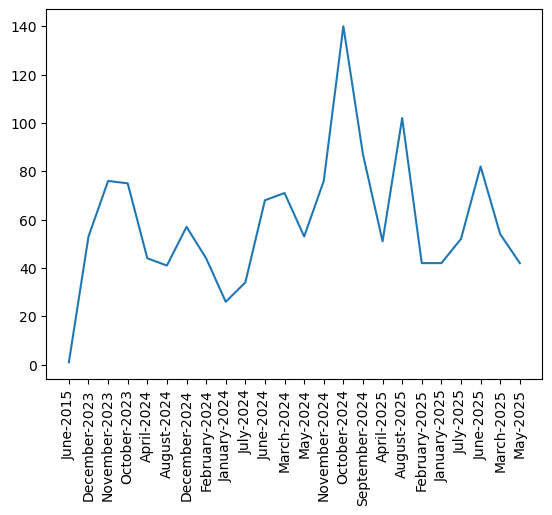

In [116]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [117]:
df['date'] = df['datetime'].dt.date

In [118]:
daily_timeline = df.groupby('date').count()['message'].reset_index()

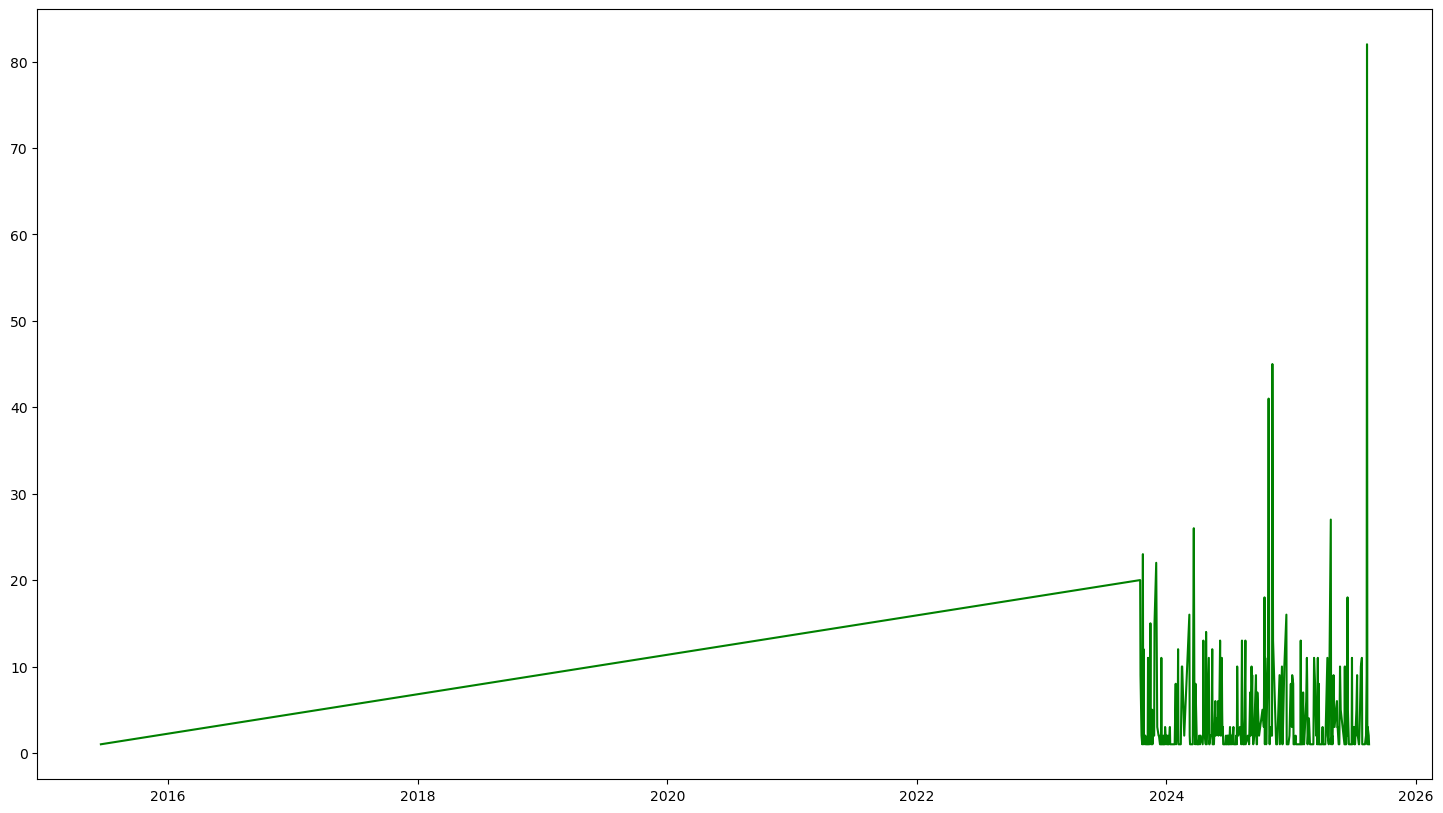

In [119]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['date'],daily_timeline['message'],color='green')


In [120]:
df['day_name'] = df['datetime'].dt.day_name()

In [123]:
df['day_name'].value_counts().reset_index()

,day_name,count
0,Sunday,271
1,Saturday,246
2,Wednesday,211
3,Thursday,184
4,Friday,178
5,Tuesday,164
6,Monday,159


In [124]:
df['month'].value_counts().reset_index()

,month,count
0,October,215
1,November,152
2,June,151
3,August,143
4,March,125
5,December,110
6,May,95
7,April,95
8,September,87
9,February,86


In [130]:
period = []
for hour in df[['day_name','hour']]['hour']:
    if hour == '23':
        period.append(str(hour) + '-' + '00')
    elif hour == '0':
        period.append('00' + '-' + str(hour+1))
    else:
        period.append(str(hour) + '-' + str(hour+1))
df['period'] = period

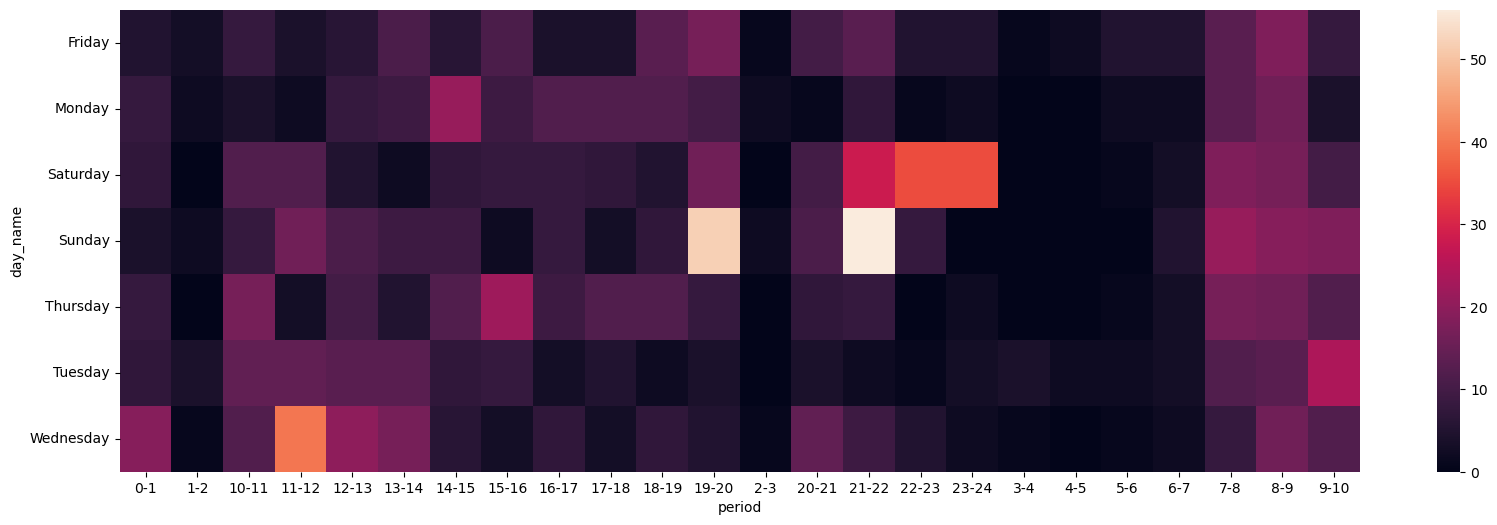

In [134]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()